In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load score dataframe from the respective path
score_df = pd.read_csv("sample_score_data.csv")

In [3]:
# Function for the user inputs
def user_input(colname):
    column_use = input("Do you want to calculate grades for " + colname + "? (y/n)")
    if column_use.lower() == 'y' or column_use.lower() == 'yes':
        max_score = int(input("What is the maximum score for this test?"))
        percentage = int(input("What is the minimum score percentage (just the number) for approval? (60% or 50% are commonly used)"))
    else:
        print("Let's skip the column then")
        max_score = 0
        percentage = 0
    return max_score, percentage

In [4]:
# Function that calculates the grade for each score
def grade_calculator(score, max_score, percentage):
    min_grade = 1.0
    max_grade = 7.0
    approval_grade = 4.0
    e = percentage/100
    if score < e * max_score:
        grade = (approval_grade - min_grade) * (score / (e * max_score)) + min_grade
    elif score >= e * max_score:
        grade = (max_grade - approval_grade) * ((score - e * max_score) / (max_score * (1 - e))) + approval_grade
    else:
        print("Something went wrong, try again")
    return (round(grade,2))

In [5]:
# Iterates through the desired columns with user_input() and apply grade_calculator()
for i in range(1,len(score_df.columns)):
    max_score, percentage = user_input(score_df.columns[i])
    if not (max_score == 0) and not (percentage == 0):
        score_df['Grade of ' + score_df.columns[i]] = score_df[score_df.columns[i]].apply(grade_calculator, args = (max_score, percentage))

In [7]:
score_df.head()

,Student,Score Random,Score Normal,Score Gamma,Grade of Score Random,Grade of Score Normal,Grade of Score Gamma
0,Student 1,88,55.15,4.11,6.10,3.76,2.03
1,Student 2,47,61.28,9.38,3.35,4.10,3.35
2,Student 3,75,66.52,3.75,5.12,4.49,1.94
3,Student 4,21,59.00,9.61,2.05,3.95,3.40
4,Student 5,90,65.02,4.38,6.25,4.38,2.09


In [8]:
# Saves grades to a csv file
score_df.to_csv("sample_grades_output_data.csv", index = False)

,Score Random,Score Normal,Score Gamma,Grade of Score Random,Grade of Score Normal,Grade of Score Gamma
count,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,54.64000,58.998000,3.884100,3.96300,4.041400,1.970800
std,27.44895,10.207365,2.567146,1.67053,0.630182,0.642274
min,1.00000,36.880000,0.130000,1.05000,2.840000,1.030000
25%,33.00000,51.137500,1.635000,2.65000,3.557500,1.412500
50%,53.00000,59.735000,3.740000,3.65000,3.985000,1.935000
75%,77.25000,66.307500,5.227500,5.29750,4.470000,2.307500
max,99.00000,86.930000,9.610000,6.92000,6.020000,3.400000


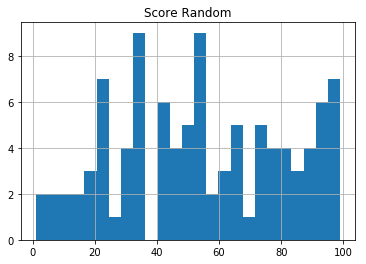

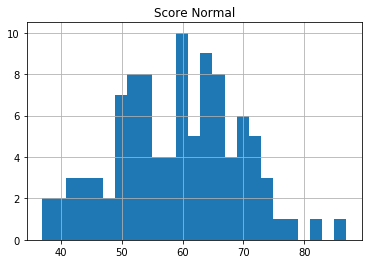

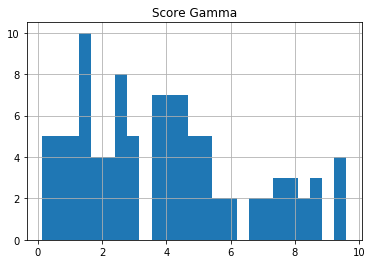

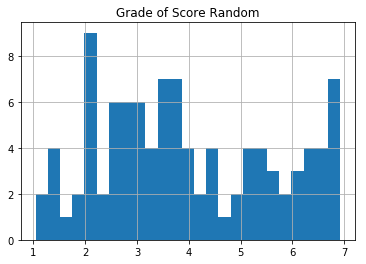

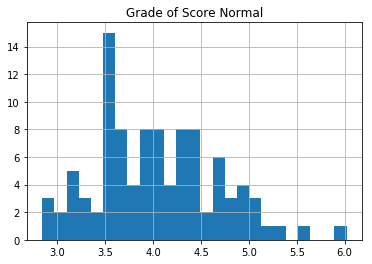

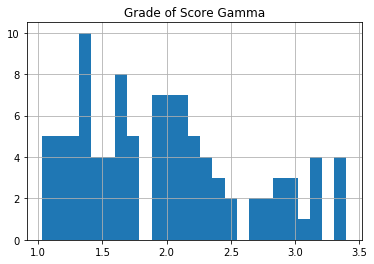

In [9]:
# Report for each column
for i in range(1,len(score_df.columns)):
    score_df.hist(column = score_df.columns[i], bins = 25)
score_df.describe()

    